In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import scatterplot
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

df= pd.read_csv("/Users/hare/Downloads/income.csv")
df.head()
dir(df)


['Age',
 'Name',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__firstlineno__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_prior

Text(0, 0.5, 'Income')

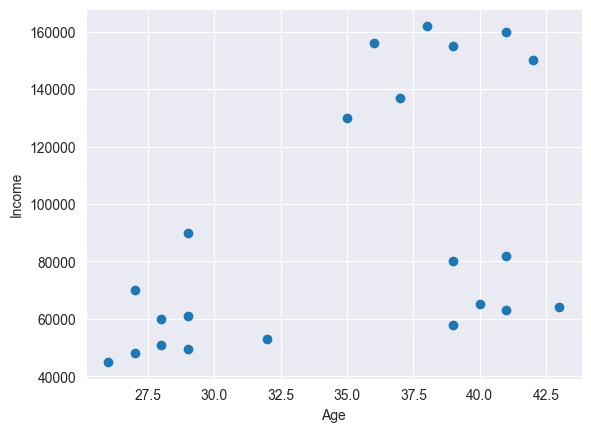

In [3]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')


In [9]:
km= KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [10]:
#here we just added a new column with y_pred as clustering
df['cluster'] = y_pred
df.head()


,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [12]:
#now we will make different dataFrames for different clusters like this:
df1=df[df.cluster == 0]
df1.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
19,Alia,39,80000,0
20,Sid,41,82000,0


Text(0, 0.5, 'Income ($)')

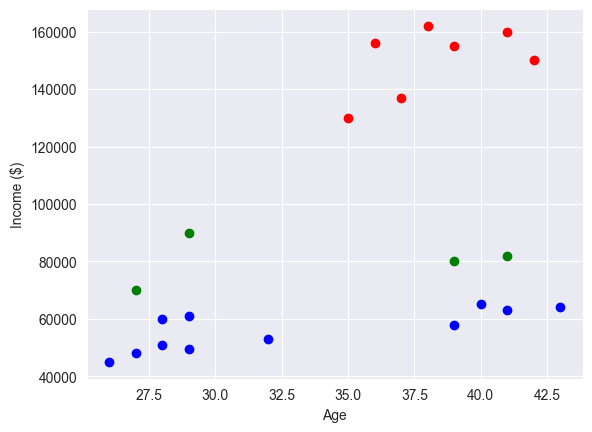

In [15]:
df2=df[df.cluster == 1]
df3=df[df.cluster == 2]
plt.scatter(df1['Age'], df1['Income($)'],color='green')
plt.scatter(df2['Age'], df2['Income($)'],color='red')
plt.scatter(df3['Age'], df3['Income($)'],color='blue')
plt.xlabel('Age')
plt.ylabel('Income ($)')
# plt. legend()

In [27]:
#Exclent we have successfully using K_means classified the points as per sum of squared errors method
#but the randomness is still there to solve it we will be using minMax Scalar:
#Since the values are extremely large we are getting the randomness.
scaler = MinMaxScaler()
df[['Income($)', 'Age']] = scaler.fit_transform(df[['Income($)', 'Age']])
df

,Name,Age,Income($),cluster,Income ($)
0,Rob,0.058824,0.213675,0,0.213675
1,Michael,0.176471,0.384615,0,0.384615
2,Mohan,0.176471,0.136752,2,0.136752
3,Ismail,0.117647,0.128205,2,0.128205
4,Kory,0.941176,0.897436,1,0.897436
5,Gautam,0.764706,0.940171,1,0.940171
6,David,0.882353,0.982906,1,0.982906
7,Andrea,0.705882,1.000000,1,1.000000
8,Brad,0.588235,0.948718,1,0.948718
9,Angelina,0.529412,0.726496,1,0.726496


In [28]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [31]:
df['cluster1'] = y_pred

df.head()


,Name,Age,Income($),Income ($),cluster1
0,Rob,0.058824,0.213675,0.213675,1
1,Michael,0.176471,0.384615,0.384615,1
2,Mohan,0.176471,0.136752,0.136752,1
3,Ismail,0.117647,0.128205,0.128205,1
4,Kory,0.941176,0.897436,0.897436,2


In [44]:
#df=df.drop(df[['Income($)']], axis=1)
df


,Name,Age,Income ($),cluster1
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


Text(0, 0.5, 'Income ($)')

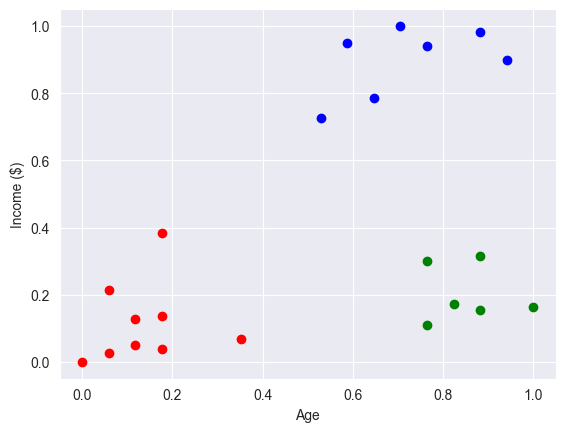

In [46]:
df01=df[df.cluster1 == 0]
df02=df[df.cluster1 == 1]
df03=df[df.cluster1 == 2]
plt.scatter(df01['Age'], df01['Income ($)'],color='green')
plt.scatter(df02['Age'], df02['Income ($)'],color='red')
plt.scatter(df03['Age'], df03['Income ($)'],color='blue')
plt.xlabel('Age')
plt.ylabel('Income ($)')


Text(0, 0.5, 'Income ($)')

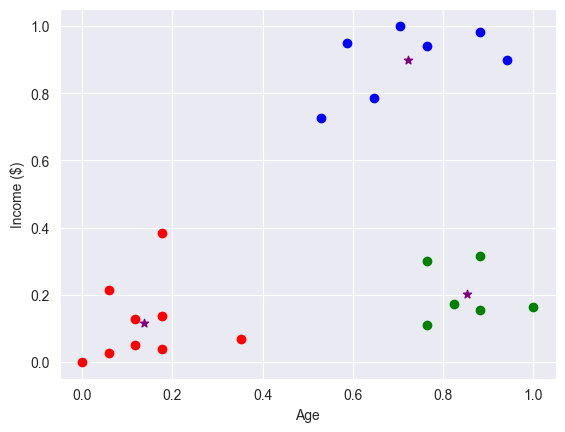

In [51]:
#as per k_means centroids are there and to know the value of it we use:
km.cluster_centers_
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple' ,marker='*', label= 'centroid')
df01=df[df.cluster1 == 0]
df02=df[df.cluster1 == 1]
df03=df[df.cluster1 == 2]
plt.scatter(df01['Age'], df01['Income ($)'],color='green')
plt.scatter(df02['Age'], df02['Income ($)'],color='red')
plt.scatter(df03['Age'], df03['Income ($)'],color='blue')
plt.xlabel('Age')
plt.ylabel('Income ($)')

In [53]:
k_range=range(1,11)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income ($)']])
    sse.append(km.inertia_)
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.39237665288019463,
 0.336528430368078,
 0.23709392356806083,
 0.20555281537743908,
 0.16547589166256543,
 0.10383752586603562,
 0.11097725208607119]

Text(0, 0.5, 'SSE')

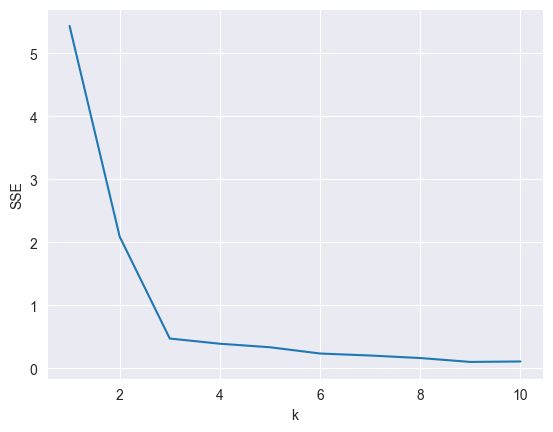

In [55]:
plt.plot(k_range, sse)
plt.xlabel('k')
plt.ylabel('SSE')

In [ ]:
#THIS IS ELBOW TECHNIQUE OF DETERMINING THE NO. OF CLUSTERS REQUIRED TO CLASSIFY A RANDOM SAMPLE
#HERE THERE IS 3
